In [1]:
conda -c rdkit rdkit


CommandNotFoundError: No command 'conda rdkit'.


Note: you may need to restart the kernel to use updated packages.


In [4]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

rdkit.__version__

'2022.09.1'

In [5]:
from rdkit.Chem import AllChem as Chem


In [6]:
import pandas as pd
from rdkit.Chem import PandasTools

In [10]:
smiles_df = pd.read_csv('smiles.csv')
smiles_df.head(10)

,smiles
0,C=C
1,C=O
2,C#N
3,CCO
4,CCC(=O)O
5,CN=C=O
6,C1=CCC=CC1
7,C1=CC=CC=C1
8,C1=C(C)C=CC=C1
9,C1CCC2CCCCC2C1


In [13]:
PandasTools.AddMoleculeColumnToFrame(smiles_df, smilesCol='smiles')
smiles_df.head(10)

,smiles,ROMol
0,C=C,<rdkit.Chem.rdchem.Mol object at 0x1532e649beb0>
1,C=O,<rdkit.Chem.rdchem.Mol object at 0x1532e63c2040>
2,C#N,<rdkit.Chem.rdchem.Mol object at 0x1532e63c2120>
3,CCO,<rdkit.Chem.rdchem.Mol object at 0x1532e63c2190>
4,CCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x1532e63c20b0>
5,CN=C=O,<rdkit.Chem.rdchem.Mol object at 0x1532e63c2200>
6,C1=CCC=CC1,<rdkit.Chem.rdchem.Mol object at 0x1532e63c22e0>
7,C1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x1532e63c2270>
8,C1=C(C)C=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x1532e63c2c80>
9,C1CCC2CCCCC2C1,<rdkit.Chem.rdchem.Mol object at 0x1532e63c2cf0>


In [19]:
print(type(smiles_df.ROMol[0]))

<class 'rdkit.Chem.rdchem.Mol'>


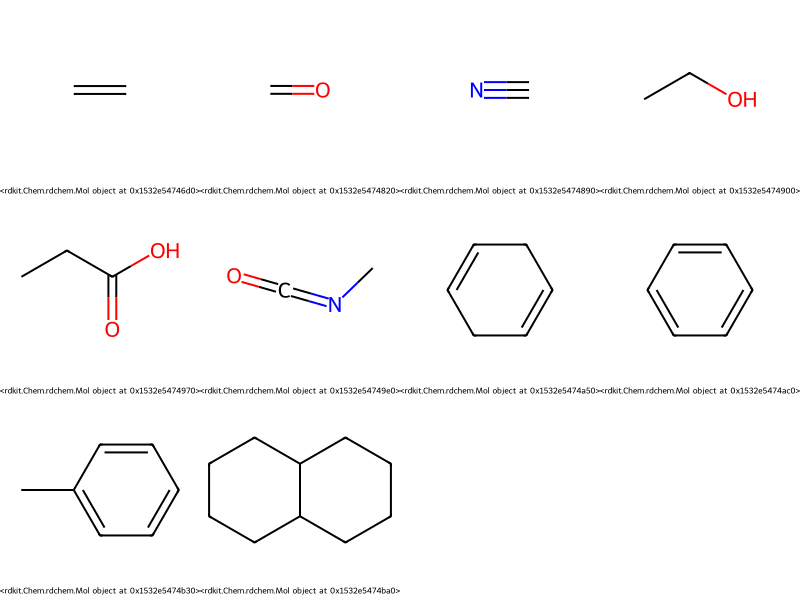

In [22]:
PandasTools.FrameToGridImage(smiles_df.head(10), legendsCol="ROMol", molsPerRow=4)

In [24]:
smiles_df["n_Atoms"] = smiles_df['ROMol'].map(lambda x: x.GetNumAtoms())
smiles_df.head(10)

,smiles,ROMol,n_Atoms
0,C=C,<rdkit.Chem.rdchem.Mol object at 0x1532e54746d0>,2
1,C=O,<rdkit.Chem.rdchem.Mol object at 0x1532e5474820>,2
2,C#N,<rdkit.Chem.rdchem.Mol object at 0x1532e5474890>,2
3,CCO,<rdkit.Chem.rdchem.Mol object at 0x1532e5474900>,3
4,CCC(=O)O,<rdkit.Chem.rdchem.Mol object at 0x1532e5474970>,5
5,CN=C=O,<rdkit.Chem.rdchem.Mol object at 0x1532e54749e0>,4
6,C1=CCC=CC1,<rdkit.Chem.rdchem.Mol object at 0x1532e5474a50>,6
7,C1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x1532e5474ac0>,6
8,C1=C(C)C=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x1532e5474b30>,7
9,C1CCC2CCCCC2C1,<rdkit.Chem.rdchem.Mol object at 0x1532e5474ba0>,10


In [25]:
smiles_df = smiles_df.drop(['ROMol'], axis=1)
smiles_df.head(10)

,smiles,n_Atoms
0,C=C,2
1,C=O,2
2,C#N,2
3,CCO,3
4,CCC(=O)O,5
5,CN=C=O,4
6,C1=CCC=CC1,6
7,C1=CC=CC=C1,6
8,C1=C(C)C=CC=C1,7
9,C1CCC2CCCCC2C1,10


In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
sys.path.append('/Users/iwatobipen/develop/chemoenv/psikit/psikit/')

In [2]:
from psikit import Psikit

In [3]:
pk = Psikit(debug=True,threads=1,memory=32)


  Memory set to  29.802 GiB by Python driver.
  Threads set to 1 by Python driver.


In [4]:
smiles_df = pd.read_csv('smiles.csv')
smiles_df["smiles"] 

0               C=C
1               C=O
2               C#N
3               CCO
4          CCC(=O)O
5            CN=C=O
6        C1=CCC=CC1
7       C1=CC=CC=C1
8    C1=C(C)C=CC=C1
9    C1CCC2CCCCC2C1
Name: smiles, dtype: object

In [8]:
for smiles in smiles_df["smiles"]:
    pk.read_from_smiles(smiles)
    %time
    pk.optimize()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs
Optimizer: Optimization complete!
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs
Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs
Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Optimizer: Optimization complete!
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs
Optimizer: Optimization complete!
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10.3 µs
Optimizer: Optimization complete!
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs
Optimizer: Optimization complete!
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs
Optimizer: Optimization complete!
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs
Optimizer: Optimization complete!
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs
Optimizer: Optimization complete!


In [5]:
energies = []

for smiles in smiles_df["smiles"]:
    pk.read_from_smiles(smiles)
    
    # Time the optimization and store the result
    %time energy = pk.optimize()
    
    # Append the energy result to the energies list
    energies.append(energy)

# Add the energies to the DataFrame
smiles_df["energy"] = energies


Optimizer: Optimization complete!
CPU times: user 1.58 s, sys: 98.7 ms, total: 1.68 s
Wall time: 2.69 s
Optimizer: Optimization complete!
CPU times: user 1.2 s, sys: 34.6 ms, total: 1.24 s
Wall time: 1.26 s
Optimizer: Optimization complete!
CPU times: user 1.06 s, sys: 47.6 ms, total: 1.1 s
Wall time: 1.12 s
Optimizer: Optimization complete!
CPU times: user 4.36 s, sys: 148 ms, total: 4.51 s
Wall time: 4.55 s
Optimizer: Optimization complete!
CPU times: user 18.6 s, sys: 1.18 s, total: 19.7 s
Wall time: 19.9 s
Optimizer: Optimization complete!
CPU times: user 6.56 s, sys: 164 ms, total: 6.72 s
Wall time: 6.79 s
Optimizer: Optimization complete!
CPU times: user 17.5 s, sys: 1.17 s, total: 18.7 s
Wall time: 18.9 s
Optimizer: Optimization complete!
CPU times: user 6.02 s, sys: 413 ms, total: 6.44 s
Wall time: 6.49 s
Optimizer: Optimization complete!
CPU times: user 14 s, sys: 948 ms, total: 14.9 s
Wall time: 15.1 s
Optimizer: Optimization complete!
CPU times: user 56.3 s, sys: 5.5 s, tota

In [6]:
smiles_df


,smiles,energy
0,C=C,-78.038769
1,C=O,-113.869536
2,C#N,-92.876942
3,CCO,-154.089919
4,CCC(=O)O,-266.858985
5,CN=C=O,-206.795593
6,C1=CCC=CC1,-231.846762
7,C1=CC=CC=C1,-230.713524
8,C1=C(C)C=CC=C1,-269.753552
9,C1CCC2CCCCC2C1,-389.204842
